In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud

import acquire as aq
import prepare as pr

## 1. Spam Data

### a. Load the spam data set.




In [3]:
df = pd.read_csv('spam_clean.csv')

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

### Prepare Data

In [5]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [6]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [8]:
spam_freq.head()

to      686
a       376
call    347
you     287
your    263
dtype: int64

In [9]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [10]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()

In [12]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()

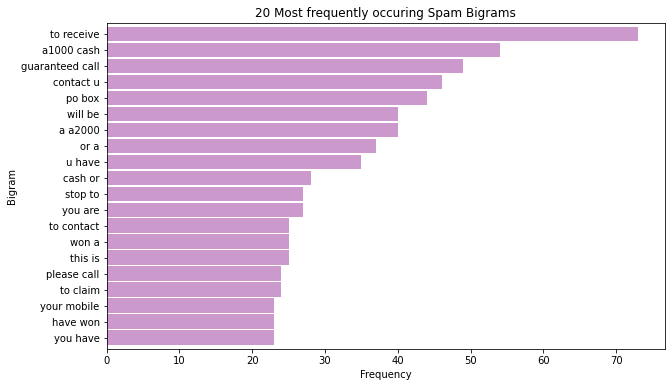

In [20]:
# Visualize the bigrams with barplot
top_20_spam = spam_bigrams.sort_values(ascending=False).head(20)

top_20_spam.sort_values().plot.barh(color='purple', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most frequently occuring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

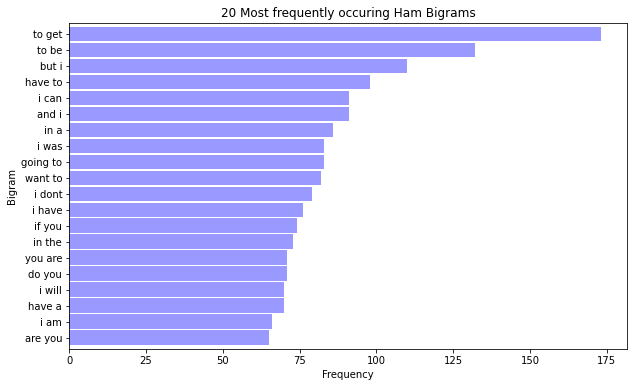

In [30]:
# Visualize the bigrams with barplot
top_20_ham = ham_bigrams.sort_values(ascending=False).head(20)

top_20_ham.sort_values().plot.barh(color='blue', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most frequently occuring Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

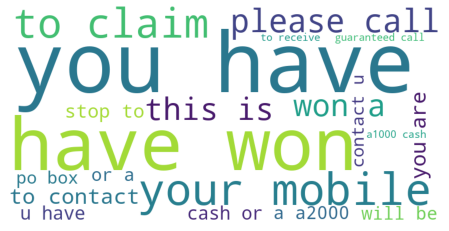

In [28]:
# Visualize spam with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam.to_dict().items()}
img = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

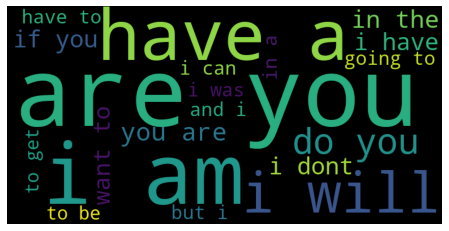

In [32]:
# Visualize ham with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham.to_dict().items()}
img = WordCloud(background_color='black',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?

Text(0.5, 1.06, 'Ham vs Spam count for the top 20 most frequent words')

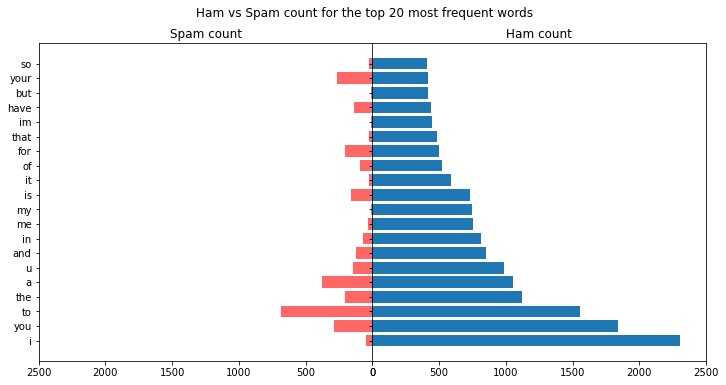

In [35]:
#create fig and subplot
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

# data series
s_ham = word_counts.sort_values('ham', ascending=False).head(20)['ham']
s_spam = word_counts.sort_values('ham', ascending=False).head(20)['spam']

# create the charts
axes[1].barh(s_ham.index, s_ham.values)
axes[0].barh(s_spam.index, s_spam.values, color = 'red', alpha = 0.6)

#invert the first axis
axes[0].invert_xaxis()
axes[0].set_xlim(2500, 0)
axes[1].set_xlim(0, 2500)

# set titles
axes[0].set_title('Spam count')
axes[1].set_title('Ham count')

plt.subplots_adjust(wspace=0)
plt.suptitle('Ham vs Spam count for the top 20 most frequent words', y = 1.06)

- Ham messages seem to be more in first person 
- Spam messages do not seem to be as personal
- the word to seems to be common in both ham and spam 


### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [36]:
#Create the trigrams for ham and spam
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))

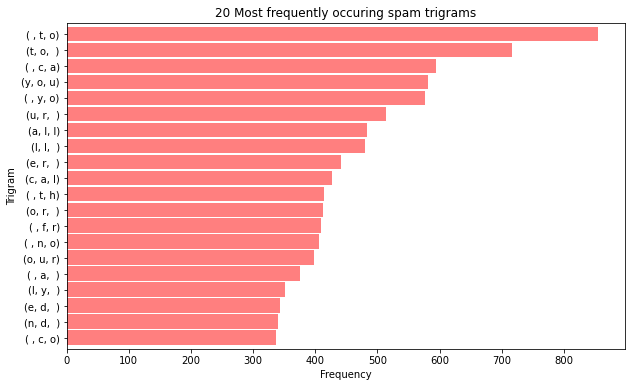

In [40]:
top_20_spam_trigrams.sort_values().plot.barh(color='red', alpha = 0.5, width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.show()

Text(0.5, 0, 'Frequency')

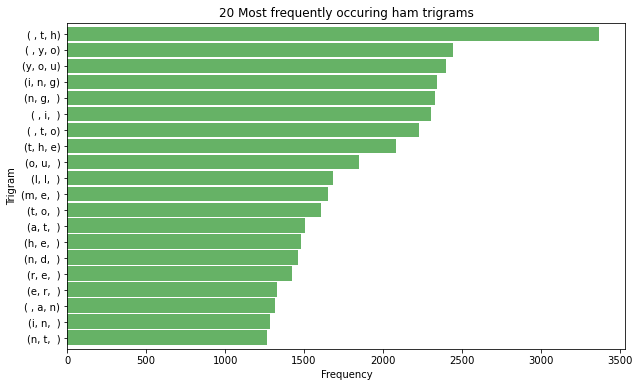

In [42]:
top_20_ham_trigrams.sort_values().plot.barh(color='green', alpha =0.6, width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [46]:
input = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/',
'https://codeup.com/data-science-myths/',
'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/']

df_blog = aq.get_blog_articles(input)

In [47]:
df_blog.head()

,title,content
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [48]:
df_blog.content

0    The rumors are true! The time has arrived. Cod...
1    By Dimitri Antoniou and Maggie Giust\nData Sci...
2    By Dimitri Antoniou\nA week ago, Codeup launch...
3    SA Tech Job Fair\nThe third bi-annual San Anto...
4    Competitor Bootcamps Are Closing. Is the Model...
Name: content, dtype: object

In [49]:
cleaned_words = clean(' '.join(df_blog.content))

In [53]:
cleaned_words = pr.tokenize(cleaned_words)

In [55]:
cleaned_words = pr.lemmatize(cleaned_words)

In [58]:
cleaned_words = pr.remove_stopwords(cleaned_words)

In [59]:
cleaned_words

'rumor true time ha arrived codeup ha officially opened application new data science career accelerator 25 seat available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution ha hit san antonio resulting explosion data scientist position across company like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demand industry program 18 week long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust ha worked heb capital group rackspace along input dozen practitioner hiring partner student work real data set realistic problem entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate im

In [61]:
cleaned_words = pd.Series(cleaned_words.split())

In [62]:
cleaned_words

0             rumor
1              true
2              time
3                ha
4           arrived
           ...     
1569    accelerator
1570           make
1571       profound
1572     difference
1573           life
Length: 1574, dtype: object

In [63]:
cleaned_words.value_counts()

data        75
science     26
company     20
learning    20
machine     14
            ..
excited      1
streamed     1
mention      1
derive       1
listed       1
Length: 799, dtype: int64

In [65]:
blog_bigrams = (pd.Series(nltk.ngrams(cleaned_words,2)).value_counts().head(20))

blog_bigrams

(data, science)            26
(machine, learning)        14
(data, scientist)          13
(job, fair)                 9
(via, giphy)                5
(busted, via)               4
(tech, job)                 4
(san, antonio)              4
(intelligence, data)        4
(bootcamp, model)           4
(giphy, myth)               4
(25, seat)                  3
(science, data)             3
(iron, yard)                3
(seat, available)           3
(sa, tech)                  3
(programming, bootcamp)     3
(career, accelerator)       3
(big, education)            3
(big, data)                 3
dtype: int64

<AxesSubplot:>

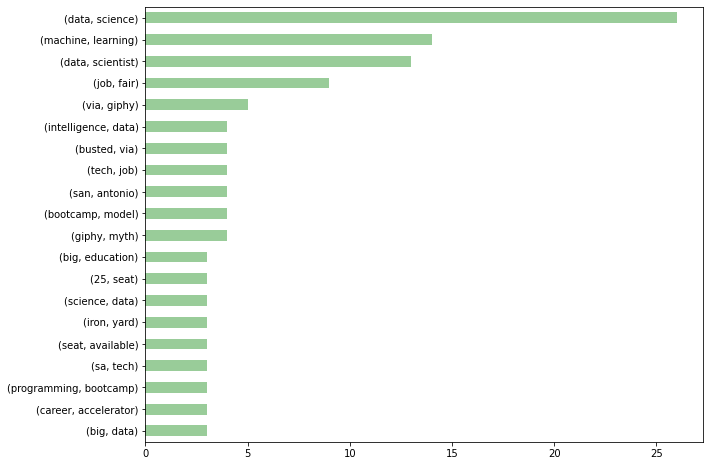

In [70]:
plt.figure(figsize=(10,8))
blog_bigrams.sort_values(ascending=True).plot.barh(color='green', alpha = 0.4)

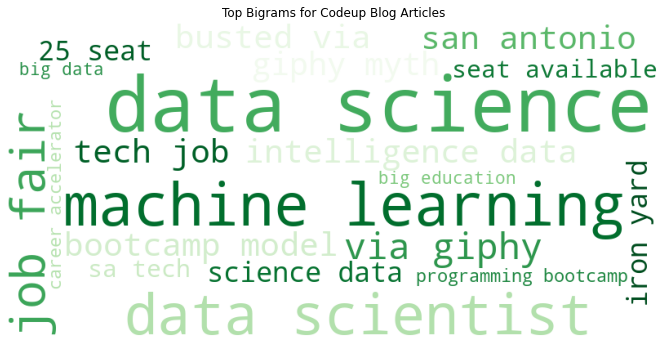

In [78]:
data = {k[0] + ' ' + k[1]: v for k, v in blog_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'Greens',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.title('Top Bigrams for Codeup Blog Articles')
plt.imshow(img)
plt.axis('off')
plt.show()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [82]:
# acquire df

article_dict = {'Business':'https://inshorts.com/en/read/business',
               'Sports':'https://inshorts.com/en/read/sports',
               'Technology':'https://inshorts.com/en/read/technology',
               'Entertainment':'https://inshorts.com/en/read/entertainment'}

news_df = aq.get_news_articles(article_dict)


In [81]:
news_df.head()

,title,content,category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman announced ...,Business
1,"₹3 lakh fine on Shilpa, Raj & his firm by SEBI...",Securities and Exchange Board of India (SEBI) ...,Business
2,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,Business
3,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",Business
4,"Google extends work from home till Oct, mandat...",Google and Alphabet's CEO Sundar Pichai on Wed...,Business


In [92]:
# break down words by each category
business_words = clean(' '.join(news_df[news_df.category=='Business'].content))

In [93]:
sports_words = clean(' '.join(news_df[news_df.category=='Sports'].content))

In [94]:
tech_words = clean(' '.join(news_df[news_df.category=='Technology'].content))

In [95]:
entertainment_words = clean(' '.join(news_df[news_df.category=='Entertainment'].content))

In [96]:
# create bigrams

business_bigrams = (pd.Series(nltk.ngrams(business_words.split(),2)).value_counts().head(20))

sports_bigrams = (pd.Series(nltk.ngrams(sports_words.split(),2)).value_counts().head(20))

tech_bigrams = (pd.Series(nltk.ngrams(tech_words.split(),2)).value_counts().head(20))

entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words.split(),2)).value_counts().head(20))

In [98]:
tech_bigrams

(will, be)           7
(on, wednesday)      5
(of, the)            4
(by, the)            4
(in, the)            4
(be, able)           3
(to, the)            3
(according, to)      3
(said, that)         3
(trading, volume)    3
(high, court)        3
(market, value)      3
(over, the)          3
(on, the)            3
(he, added)          3
(able, to)           3
(report, by)         2
(also, said)         2
(said, the)          2
(to, a)              2
dtype: int64

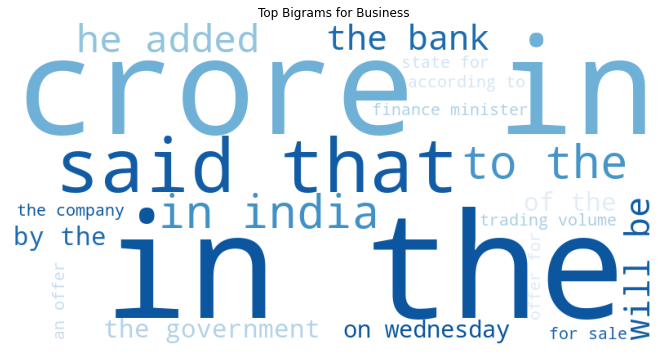

In [105]:
# word cloud for business bigrams

data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'Blues',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Top Bigrams for Business')
plt.axis('off')
plt.show()

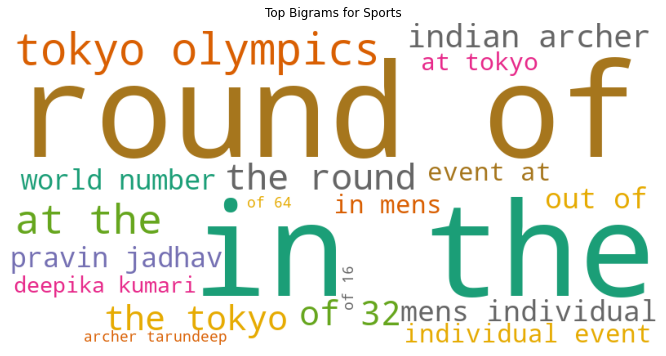

In [109]:
# word cloud for sports bigrams

data = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'Dark2_r',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Top Bigrams for Sports')
plt.axis('off')
plt.show()

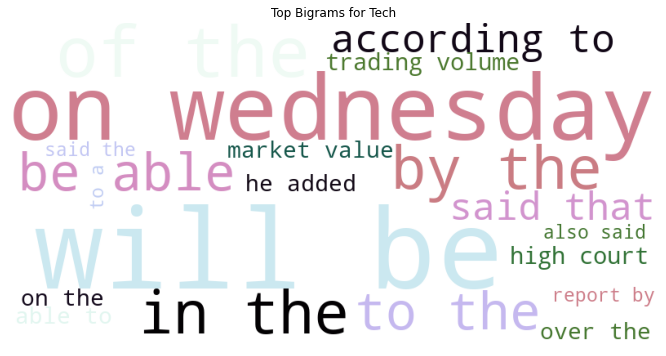

In [112]:
# word cloud for tech bigrams

data = {k[0] + ' ' + k[1]: v for k, v in tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'cubehelix_r',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Top Bigrams for Tech')
plt.axis('off')
plt.show()

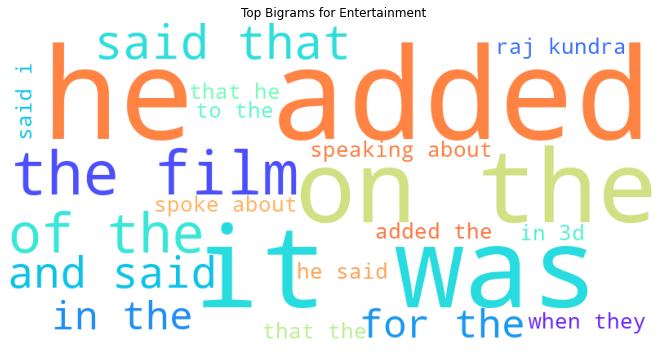

In [115]:
# word cloud for entertainment
data = {k[0] + ' ' + k[1]: v for k, v in entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', colormap = 'rainbow',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Top Bigrams for Entertainment')
plt.axis('off')
plt.show()